<center>
<hr>

##Proyecto NetworkX 

##Analisis de redes 
 

<hr>
</center>



##Importamos las librerias Pandas, Networkx, matplotlib, Numpy

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from operator import itemgetter


G = nx.Graph()

<hr>

##¿Que es Network x?
###Es una libreria que se usa para el estudio de  grafos y el analisis de redes en python 


In [ ]:
#g.add_node("P1")
#g.add_node("P2")

In [ ]:
#g.nodes()


<hr>

###Usamos Dataframe Para ver las tabla de datos 


In [ ]:
df=pd.read_csv('Datos_Nuevos.csv')


In [ ]:
df

,id,P1,P2,P3,P4,P5
0,1,1,0,1,1,0
1,2,1,1,0,1,1
2,3,0,1,1,0,0
3,4,0,0,1,1,0
4,5,1,0,0,1,1
...,...,...,...,...,...,...
94,96,1,1,0,1,0
95,97,0,1,0,1,0
96,98,1,1,0,0,1
97,99,1,1,1,1,0


In [ ]:
#df.head(5)

In [ ]:
edge_list=[]

<hr>

##Lista que Tomas los datos de los profesores
##Interesacciones Especificamos  que podemos ver es (>"3")


In [ ]:
for index,row in df.iterrows():
  prop0=np.array([row[1],row[2],row[3],row[4],row[5]])
# multiply x1 and x2 elementwise 
  start=index+1
  for index2,row2 in df.iloc[start:].iterrows():
    prop1=np.array([row2[1],row2[2],row2[3],row2[4],row2[5]])
    if(np.multiply(prop0,prop1).sum()>3):
      edge_list.append([index,index2])

In [ ]:
df_list=pd.DataFrame(edge_list)

In [ ]:
df_list

,0,1
0,1,6
1,1,14
2,1,16
3,1,22
4,1,25
...,...,...
486,70,97
487,73,80
488,78,85
489,78,92


In [ ]:
df_list.to_csv('datos_list.csv',header=None,index=False,sep=" ")

In [ ]:
G=nx.read_edgelist('datos_list.csv')

<hr>

###Aqui podemos ver los numero de nodos que tiene conexiones unos de otros 

In [ ]:
#G = nx.path_graph(4)
G.number_of_nodes()

44

In [ ]:
%matplotlib inline

Graficamos (G) NX

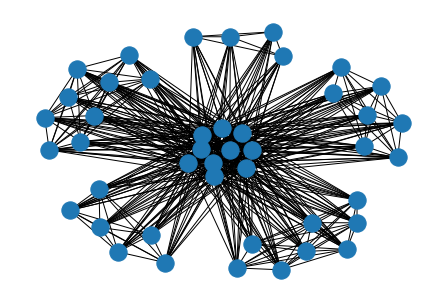

In [ ]:
nx.draw(G)


<hr>

###**Podemos observar que los profeseores que son los que tiene la mayores conexiones se encuentra en el centro del grafos que son por asi decirlo los nodos principales de grafo**
<hr>

In [ ]:
jm=nx.erdos_renyi_graph(100, 0.1)

In [ ]:
#G.EdgeView

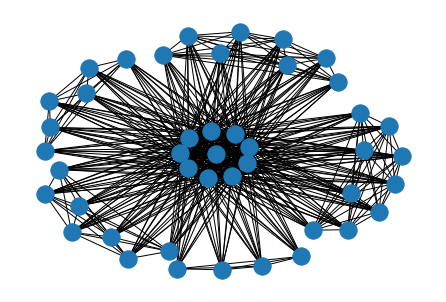

In [ ]:
nx.draw_kamada_kawai(G)

<hr>

##Analisis de la red
*Permite comprender y modelar sistemas complejos* 

In [ ]:
nx.is_connected(G)

True

<hr>

#*Diametro*
###Son las conexiones que tiene los nodos entre otros 

In [ ]:
nx.diameter(G)

2

<hr>

###*Densidad*
###Existe: 51,9% Relaciones del total posibles 

In [ ]:
nx.density(G) 

0.5190274841437632

##Contedor de los nodos

In [ ]:
indeg=dict(jm.degree()).values()

In [ ]:
from collections import Counter 
degin_distri=Counter(indeg)
print(degin_distri)

Counter({10: 15, 9: 12, 8: 12, 7: 11, 11: 9, 12: 9, 13: 8, 5: 5, 14: 5, 6: 5, 15: 4, 4: 3, 22: 1, 17: 1})


<hr>

## Histograma 
función ordena los elementos de un iterable dado en un orden específico (ascendente o descendente) 

el histograma del grafo  (G) muestra que hay un número común de Alumnos entre las personas el cual en este caso es 10. En el histograma de Redes  se puede evidenciar que hay más personas con Profesores  y muy pocas personas con sin  Alumnos

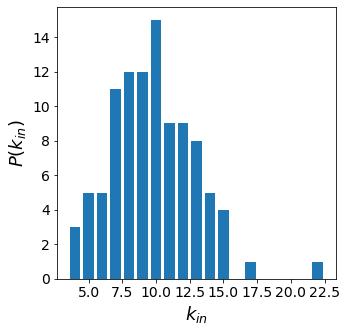

In [ ]:
x=[]
y=[]
for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i])
plt.figure(figsize=(5,5))    
plt.bar(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.yscale('log')
#plt.xscale('log')
#plt.axis([1,10000,0.00001,1.0])
plt.show()

Grafico nodos Enumerados que nos servira para sorted degree

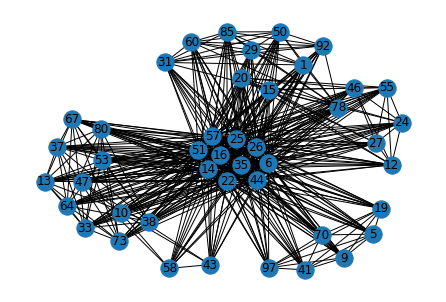

In [ ]:
nx.draw(G,with_labels = True)

In [ ]:
degree_dict = dict(G.degree(jm.nodes()))
nx.set_node_attributes(jm, degree_dict, 'degree')

In [ ]:
sorted_degree = sorted(degree_dict.items(), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:


##Centralidad 
Eigenvector Centrality es un algoritmo que mide la influencia transitiva de los nodos . Las relaciones que se originan en los nodos de puntuación alta contribuyen más a la puntuación de un nodo que las conexiones de los nodos de puntuación baja. Una puntuación de vector propio alta significa que un nodo está conectado a muchos nodos que tienen puntuaciones altas.

In [ ]:
eigenvector_dict = nx.eigenvector_centrality(jm) # Run eigenvector centrality

# Assign each to an attribute in your network

nx.set_node_attributes(jm, eigenvector_dict, 'eigenvector')

In [ ]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

Top 20 nodes by eigenvector centrality:
(35, 0.22227184022631122)
(83, 0.16272726074843508)
(98, 0.1623204898215761)
(60, 0.15351285012577728)
(88, 0.14837489805364296)
(78, 0.14648358725785737)
(92, 0.14115150159801462)
(90, 0.1380572364367105)
(3, 0.13670559277440847)
(85, 0.13588396574969097)
(0, 0.1351465194575228)
(74, 0.13094711022609168)
(2, 0.12795726083375403)
(32, 0.1244018897218129)
(24, 0.12377132813569376)
(21, 0.12309984947580346)
(10, 0.12126240085381303)
(72, 0.1207155174887263)
(17, 0.12016186063845816)
(94, 0.11824856813367672)


<hr>

##Conclusion
**Como podemos apreciar Python puede ser un gran aliado para el trabajo con datos de tipo Redes , en este caso de tipo de red. Los scripts que programemos pueden ser posteriormente reaprovechados para otros tipos de áreas o estudios, permitiendo así sacarle la máxima rentabilidad a nuestro trabajo con estas potentes librerías.**